In [27]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [43]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\av

True

In [48]:
nlp = spacy.load("en_core_web_sm")

In [45]:
df = pd.read_csv("IMDB Dataset.csv")  # Change path if needed
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["movie", "film", "one", "like", "story", "time", "would", "characters", "character"])

def clean_text(text):
        text = text.lower()
        text = re.sub(r"<.*?>", "", text)  
        text = re.sub(r"[^a-z\s]", "", text) 
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in custom_stopwords and len(word) > 2]
        return tokens

In [ ]:
df["clean_tokens"] = df["review"].apply(clean_text)

In [50]:
stemmer = PorterStemmer()

def apply_stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

df["stemmed"] = df["clean_tokens"].apply(apply_stemming)

In [52]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df["lemmatized"] = df["clean_tokens"].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])


In [ ]:
def get_top_n_words(token_lists, n=30):
    all_words = [word for tokens in token_lists for word in tokens]
    freq_dist = Counter(all_words)
    return freq_dist.most_common(n)

top_stemmed = get_top_n_words(df["stemmed"])
top_lemmatized = get_top_n_words(df["lemmatized"])

df_stemmed_top = pd.DataFrame(top_stemmed, columns=["word", "frequency"])
df_lemmatized_top = pd.DataFrame(top_lemmatized, columns=["word", "frequency"])


C:\Users\DELL\AppData\Local\Temp\ipykernel_4636\1938400601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="word", data=df_stemmed_top, palette="Blues_r")


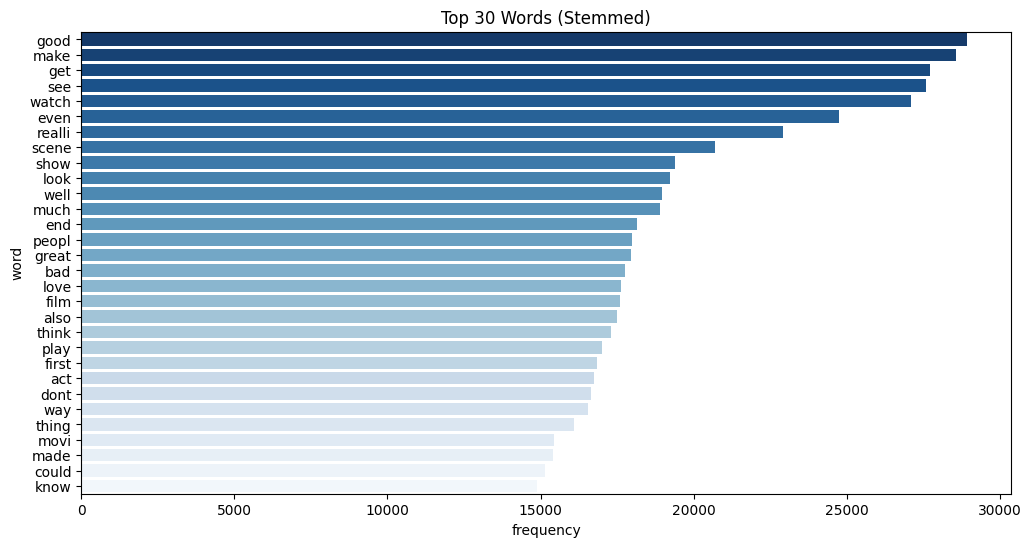

C:\Users\DELL\AppData\Local\Temp\ipykernel_4636\1938400601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="word", data=df_lemmatized_top, palette="Greens_r")


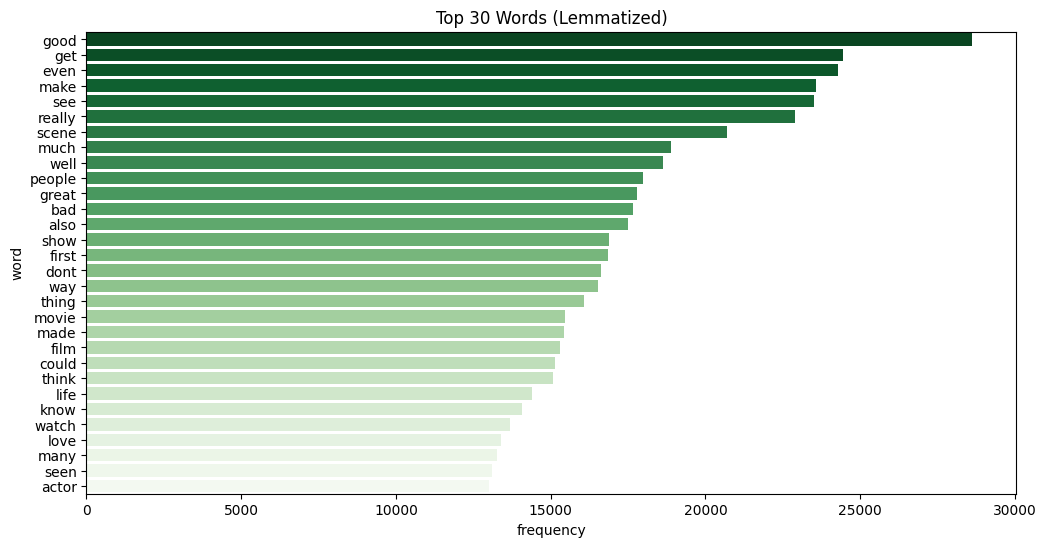

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x="frequency", y="word", data=df_stemmed_top, palette="Blues_r")
plt.title("Top 30 Words (Stemmed)")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="frequency", y="word", data=df_lemmatized_top, palette="Greens_r")
plt.title("Top 30 Words (Lemmatized)")
plt.show()